# Replication notebook - policy inventory maps

Sam Maurer, December 2017, Python 3.6

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

## Map of rent control jurisdictions

Policy inventory: http://www.urbandisplacement.org/policy-tools-2  
State outlines: https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html

In [2]:
# Urban Displacement policy inventory
path = '/Users/smmaurer/Dropbox/Data/Urban Displacement/Policy_inventory_v1/Policy_inventory_v1.shp'
policies = gpd.read_file(path)
print(len(policies))
print(policies.columns)

101
Index(['NAME', 'inv_justca', 'inv_stabil', 'inv_review', 'inv_mobile',
       'inv_sropre', 'inv_condoc', 'inv_forecl', 'inv_jobsho', 'inv_commer',
       'inv_trustf', 'inv_inclus', 'inv_densit', 'inv_landtr', 'inv_firsts',
       'inv_total', 'geometry'],
      dtype='object')


In [3]:
# Adjust to reflect 2017 data
policies.loc[policies.NAME.isin(['Campbell','Fremont','Palo Alto']), 'inv_stabil'] = 0
policies.loc[policies.NAME.isin(['Mountain View','Richmond']), 'inv_stabil'] = 1

In [4]:
# Census state outlines
path = '/Users/smmaurer/Dropbox/Data/Census shapefiles/cb_2016_us_state_500k/cb_2016_us_state_500k.shp'
states = gpd.read_file(path)
print(len(states))
print(states.columns)

56
Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [5]:
# Generate points for labels
policies['coords'] = policies['geometry'].apply(lambda x: x.representative_point().coords[:])
policies['coords'] = [coords[0] for coords in policies['coords']]

In [6]:
# Divide data into layers for mapping
policy_no = policies.loc[policies.inv_stabil == 0]
policy_yes = policies.loc[policies.inv_stabil == 1]

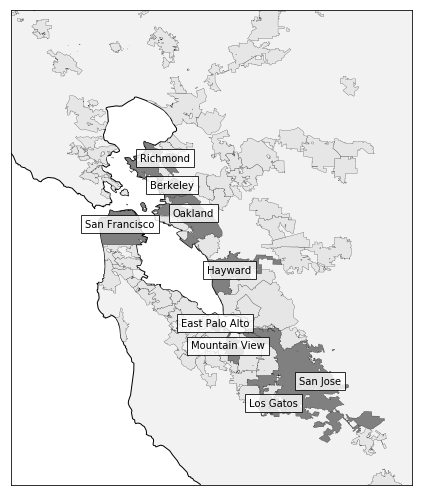

In [7]:
fig, ax = plt.subplots(figsize=(6,7))
ax.set_aspect(1.1)
ax.set_xlim((-122.8, -121.5))
ax.set_ylim((37, 38.4))
# plt.title("Jurisdictions with rent stabilization or rent control")

states.plot(ax=ax, color=(0.95,0.95,0.95), edgecolor='black', zorder=1)
policy_no.plot(ax=ax, color=(0.9,0.9,0.9), edgecolor='black', linewidth=0.2)
policy_yes.plot(ax=ax, color=(0.5,0.5,0.5), edgecolor='black', linewidth=0.2)

for idx, row in policy_yes.iterrows():
    plt.annotate(s=row.NAME, xy=row.coords, horizontalalignment='center', 
                 bbox=dict(facecolor='white', alpha=0.8))

ax.set_xticks([])
ax.set_xticklabels('')
ax.set_yticks([])
ax.set_yticklabels('')

plt.tight_layout()
plt.show()

In [8]:
fig.savefig('../output/figure-5.pdf')

## Map of inclusionary zoning jurisdictions

In [9]:
# Urban Displacement policy inventory
path = '/Users/smmaurer/Dropbox/Data/Urban Displacement/Policy_inventory_v1/Policy_inventory_v1.shp'
policies = gpd.read_file(path)
print(len(policies))
print(policies.columns)

101
Index(['NAME', 'inv_justca', 'inv_stabil', 'inv_review', 'inv_mobile',
       'inv_sropre', 'inv_condoc', 'inv_forecl', 'inv_jobsho', 'inv_commer',
       'inv_trustf', 'inv_inclus', 'inv_densit', 'inv_landtr', 'inv_firsts',
       'inv_total', 'geometry'],
      dtype='object')


In [10]:
# Adjust to reflect 2017 data
policies.loc[policies.NAME.isin(['Morgan Hill','Lafayette']), 'inv_inclus'] = 1

In [11]:
# Census state outlines
path = '/Users/smmaurer/Dropbox/Data/Census shapefiles/cb_2016_us_state_500k/cb_2016_us_state_500k.shp'
states = gpd.read_file(path)
print(len(states))
print(states.columns)

56
Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [12]:
# Generate points for labels
policies['coords'] = policies['geometry'].apply(lambda x: x.representative_point().coords[:])
policies['coords'] = [coords[0] for coords in policies['coords']]

In [13]:
# Divide data into layers for mapping
policy_no = policies.loc[policies.inv_inclus == 0]
policy_yes = policies.loc[policies.inv_inclus == 1]

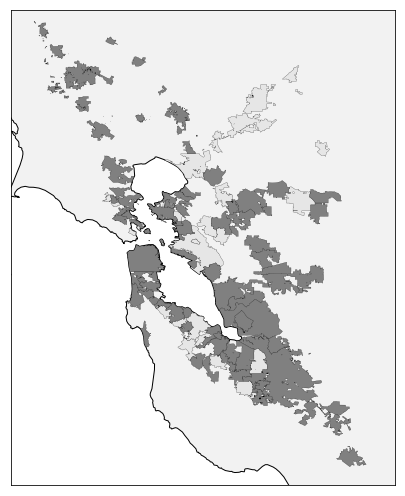

In [14]:
fig, ax = plt.subplots(figsize=(6,7))
ax.set_aspect(1.1)
ax.set_xlim((-123, -121.4))
ax.set_ylim((36.9, 38.7))
# plt.title("Jurisdictions with inclusionary zoning policies")

states.plot(ax=ax, color=(0.95,0.95,0.95), edgecolor='black', zorder=1)
policy_no.plot(ax=ax, color=(0.9,0.9,0.9), edgecolor='black', linewidth=0.2)
policy_yes.plot(ax=ax, color=(0.5,0.5,0.5), edgecolor='black', linewidth=0.2)

ax.set_xticks([])
ax.set_xticklabels('')
ax.set_yticks([])
ax.set_yticklabels('')

plt.tight_layout()
plt.show()

In [15]:
fig.savefig('../output/figure-6.pdf')

Resources
- http://www.urbandisplacement.org/policy-tools-2#
- https://matplotlib.org/api/colors_api.html
- http://matplotlib.org/api/axes_api.html#ticks-and-tick-labels
- https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.text
- http://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
- http://geopandas.org/mapping.html